In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

# Creation du DataSet

In [ ]:
centers = [[2, 3], [5, 5], [1, 8]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, 
                          centers=np.array(centers),
                          random_state=1)
all_data = []
for i,j in zip(data,labels):
    t=np. append(i, j)
    t = list(t)
    all_data.append([str(round(t[0], 2)),str(round(t[1], 2)),str(int(t[2]))])
all_data
a = np.asarray(all_data)
np.savetxt("knn_data.csv", all_data, delimiter=",",header='attribut_1,attribut_2,target', comments='', fmt='%s')

# importation du dataset

In [ ]:
df = pd.read_csv("knn_data.csv")
df.head()

,attribut_1,attribut_2,target
0,-0.24,8.88,2
1,1.02,8.18,2
2,2.56,8.11,2
3,4.86,4.88,1
4,6.12,5.41,1


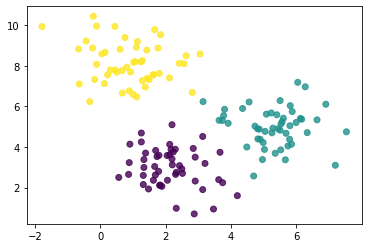

In [ ]:
plt.scatter(df.attribut_1,df.attribut_2, c=df.target, alpha=0.8)

### division du dataset

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(df[df.columns.drop('target')], df.target,train_size=0.3)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

KNeighborsClassifier()

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=40)
knn1.fit(train_data, train_labels)

KNeighborsClassifier(n_neighbors=40)

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# Validation Croisee

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv=KFold(4)
cross_val_score(knn,test_data, test_labels,cv=cv)

array([1., 1., 1., 1.])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv=KFold(4)
cross_val_score(knn,df[df.columns.drop('target')], df.target,cv=cv)

array([1.        , 0.97368421, 1.        , 1.        ])

In [ ]:
cv=KFold(4)
sp=cv.split(X=df[df.columns.drop('target')], y=df.target)
for ii in enumerate(sp):
    print("_____________")
    print(ii)

_____________
(0, (array([ 38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])))
_____________
(1, (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27, 

In [ ]:
cv=KFold(4)
sp=cv.split(X=df[df.columns.drop('target')], y=df.target)
for ii, (tr, tt) in enumerate(sp):
    print("_____________")
    print(ii)
    print(tr)
    print(ii)
    print(tt)

_____________
0
[ 38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149]
0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
_____________
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(4)
cross_val_score(knn,test_data, test_labels,cv=cv)

array([0.96296296, 1.        , 1.        , 1.        ])

In [ ]:
predicted = knn.predict(test_data)
print(accuracy_score(predicted, test_labels))

1.0


In [ ]:
predicted = knn1.predict(test_data)
print(accuracy_score(predicted, test_labels))

0.6190476190476191


In [ ]:
cm = confusion_matrix(test_labels, predicted)
cm

array([[ 0, 40,  0],
       [ 0, 33,  0],
       [ 0,  0, 32]])

Text(33.0, 0.5, 'Truth')

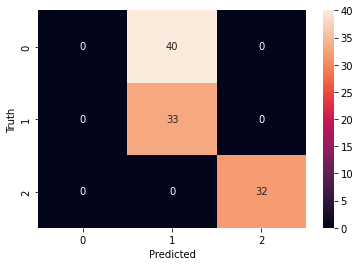

In [ ]:
plt.figure()
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')